In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data Loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:51<00:00, 3339734.10it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5  # Standard deviation for weight initialization
# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)
# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

In [3]:
# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

Epoch 1/20, Loss: 0.9769850181937217
Epoch 2/20, Loss: 0.949868709385395
Epoch 3/20, Loss: 0.9361212586164475
Epoch 4/20, Loss: 0.9275635056495667
Epoch 5/20, Loss: 0.921620847940445
Epoch 6/20, Loss: 0.9172147932052612
Epoch 7/20, Loss: 0.9138028975129128
Epoch 8/20, Loss: 0.9110764181017875
Epoch 9/20, Loss: 0.908847561120987
Epoch 10/20, Loss: 0.9069949587583542
Epoch 11/20, Loss: 0.9054345507621765
Epoch 12/20, Loss: 0.9041072670221328
Epoch 13/20, Loss: 0.9029685152173043
Epoch 14/20, Loss: 0.901984761595726
Epoch 15/20, Loss: 0.9011304070949554
Epoch 16/20, Loss: 0.900385211288929
Epoch 17/20, Loss: 0.8997323789000511
Epoch 18/20, Loss: 0.8991586419939995
Epoch 19/20, Loss: 0.898653050839901
Epoch 20/20, Loss: 0.898206313252449


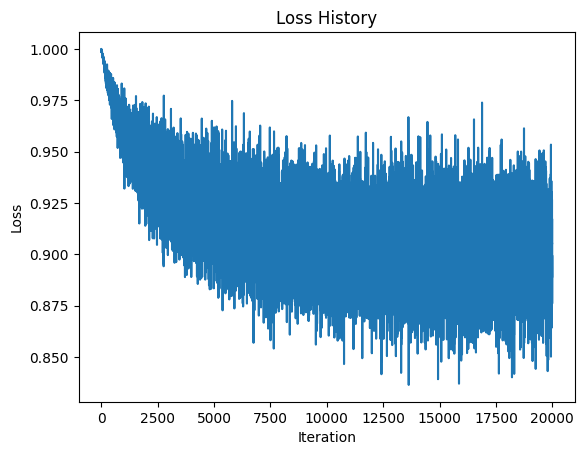

In [4]:
# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [5]:
# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

Training accuracy: 32.22%


In [6]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

Test accuracy: 32.41%
